# Homework 05

## Katie Hutschenreuter
## Due Tuesday, March 29th

In [1]:
from __future__ import print_function
from mpl_toolkits.basemap import Basemap
from __future__ import print_function   # Python 2/3 compatability

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shapely.geometry
import shapely.ops

from scipy import spatial

import pandas as pd
pd.set_option('max_rows', 6)
from scipy import interpolate

### 1. Flyover states

_[This is very similar to the exercise done in class. This is a continuation.]_

What states do you see when you fly from LA (airport code LAX) to NYC (airport code EWR)?

> LAX: 33.9425° N, 118.4081° W

> EWR: 40.6925° N, 74.1686° W

Load in the `states_21basic` shapefile using these commands:

    from mpl_toolkits.basemap import Basemap
    m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
            urcrnrlon=-50.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-100.,lat_ts=20.)
    m.readshapefile('../materials/states_21basic/states', 'states')

The boundary information for all of the states is now held in an attribute of the map object `m.states`, which is a list of lists of x-y pairs denoting the boundaries. Next use the `m.gcpoints` function to get the points along the great circle path. Convert all of these things into Shapely objects, and check for intersections. Add a buffer of 100km to the flight path to see what states you might potentially see along the way. Use this analysis to provide the following:

1. Create and display a map that shows the flight path, with the states that are seen along the flight path clearly highlighted in some way.

2. Use the information in m.states_info to extract and print a list containing the names of the states seen, with unique names. (see `np.unique`)


(51,
 5,
 [-178.21759836236586, 18.92178634508703, 0.0, 0.0],
 [-66.96927125875777, 71.40623539396698, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x10c2120f0>)

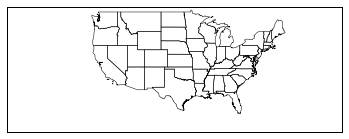

In [10]:
from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
m.readshapefile('states_21basic/states', 'states')


The states seen on a flight from Los Angelos to New York are:
 ['Pennsylvania', 'New Jersey', 'Indiana', 'Nevada', 'California', 'Ohio', 'Illinois', 'Colorado', 'Kansas', 'Missouri', 'Arizona', 'New Mexico']


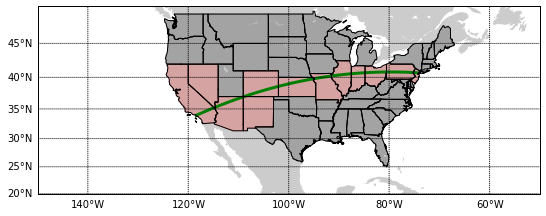

In [19]:
fig = fig = plt.figure(figsize=(9,6)) 
ax = fig.add_subplot(111)

m.fillcontinents()

pathx,pathy = m.gcpoints(-118.4081,33.9425,-74.1686,40.6925,100)
line = shapely.geometry.LineString(zip(pathx,pathy))
ax.plot(pathx,pathy,'g',lw=3)

polys=[]
intpolys=[]
info = []
for state in m.states:
    polys.append(shapely.geometry.Polygon(state))
        

for i,poly in enumerate(polys):
    if poly.intersects(line):
        color='r'
        intpolys.append(poly)
        info.append(m.states_info[i]['STATE_NAME'])
    else:
        color='k'
    plt.plot(*poly.boundary.xy, color='k', lw=1)
    plt.fill(*poly.boundary.xy,color=color,alpha=0.2)

m.set_axes_limits()
m.drawmeridians(np.arange(-140, -40, 20), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(20, 60, 5), labels=[1, 0, 0, 0])

print('The states seen on a flight from Los Angelos to New York are:\n',info)


### 2. Area in a Voronoi diagram

Given the series of points:

     np.array([[ 0.77354201,  0.34072038],
               [ 0.43807549,  0.93001924],
               [ 0.5624092 ,  0.79438991],
               [ 0.02536295,  0.46180244],
               [ 0.59533179,  0.07522803],
               [ 0.47867418,  0.70302822],
               [ 0.30371564,  0.83135442],
               [ 0.5856915 ,  0.16340903],
               [ 0.14700491,  0.60268997],
               [ 0.97098631,  0.51692456]])
               
create a Voronoi diagram, and calculate the area contained in the finite regions. What fraction of the total area is at least 0.001 unit away from any boundary? 0.01 away? And 0.1 away?


The area's of each Voronoi region respectively are: 

1 : 0.27180150761853994 

2 : 0.11884011200879535 

3 : 0.2314669514129665 

4 : 0.09119779343732906 

5 : 0.30058485685579694 



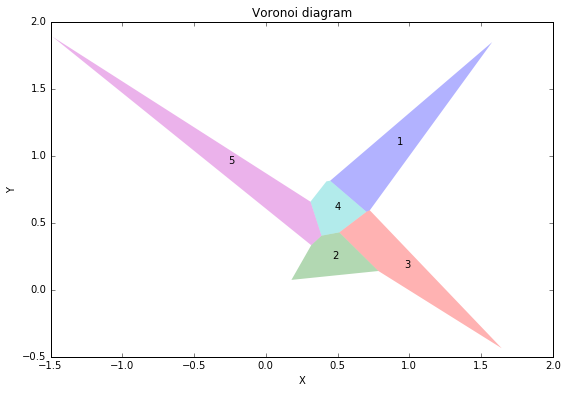

In [168]:
pts = np.array([[ 0.77354201,  0.34072038],
               [ 0.43807549,  0.93001924],
               [ 0.5624092 ,  0.79438991],
               [ 0.02536295,  0.46180244],
               [ 0.59533179,  0.07522803],
               [ 0.47867418,  0.70302822],
               [ 0.30371564,  0.83135442],
               [ 0.5856915 ,  0.16340903],
               [ 0.14700491,  0.60268997],
               [ 0.97098631,  0.51692456]])
vor = spatial.Voronoi(pts)

space = []
area = []
boundlist = []
dialatedbound = []
for i,indices in enumerate(vor.regions):
    if not indices: continue     # check for empty regions
    if -1 in indices: continue   # region includes a vertex out of the diagram (the region goes to infinity)
    #plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)
    ind=vor.regions[i]
    x=vor.vertices[ind,0]
    y=vor.vertices[ind,1]
    space.append(shapely.geometry.Polygon(zip(x,y)))
    bound = shapely.geometry.LinearRing(zip(x,y))
    boundlist.append(bound)
    dialatedbound.append(bound.buffer(0.1))

for shape in space:
    area.append(shape.area)
    

print("The area's of each Voronoi region respectively are: \n")
for n in np.arange(0,5):
    print(n+1,':',area[n],'\n')

fig = fig = plt.figure(figsize=(9,6)) 
ax = fig.add_subplot(111)
    
for i,indices in enumerate(vor.regions):
    if not indices: continue     # check for empty regions
    if -1 in indices: continue   # region includes a vertex out of the diagram (the region goes to infinity)
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)
       
plt.text(space[0].centroid.xy[0][0],space[0].centroid.xy[1][0],1)
plt.text(space[1].centroid.xy[0][0],space[1].centroid.xy[1][0],2)
plt.text(space[2].centroid.xy[0][0],space[2].centroid.xy[1][0],3)
plt.text(space[3].centroid.xy[0][0],space[3].centroid.xy[1][0],4)
plt.text(space[4].centroid.xy[0][0],space[4].centroid.xy[1][0],5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Voronoi diagram')

In [185]:
#Total area of the Voronoi shape
totalarea = sum(area)
bound = shapely.geometry.MultiLineString(boundlist)

The fraction of total area 0.001 units away from any boundary is:
 0.013909738224329345


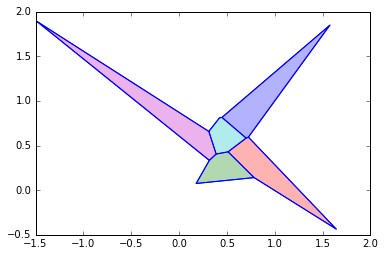

In [174]:
dialatedbound1 = bound.buffer(0.001)

pts = shapely.geometry.base.dump_coords(dialatedbound1)

x,y = zip(*pts[0:131])
plt.plot(x,y)

innerspace=[]
innerarea=[]
for shape in np.arange(131,136):
    x1,y1 = zip(*pts[shape])
    innerspace.append(shapely.geometry.Polygon(zip(x1,y1)))
    plt.plot(x1,y1,'b')

for i,indices in enumerate(vor.regions):
    if not indices: continue     # check for empty regions
    if -1 in indices: continue   # region includes a vertex out of the diagram (the region goes to infinity)
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)
    
#Need to calculate the area of the regions in the center and subtract 
#them from the total area of the shape to get the area contained
#in the buffer

for shape in innerspace:
    innerarea.append(shape.area)
    
print('The fraction of total area 0.001 units away from any boundary is:\n',(totalarea-sum(innerarea))/totalarea)

The fraction of total area 0.01 units away from any boundary is:
 0.13474638465404395


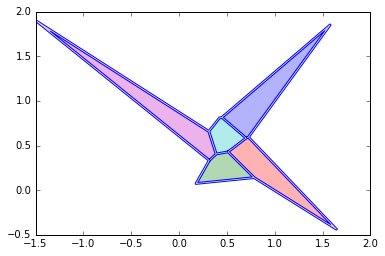

In [182]:
dialatedbound2 = bound.buffer(0.01)

pts = shapely.geometry.base.dump_coords(dialatedbound2)

x,y = zip(*pts[0:131])
plt.plot(x,y)

innerspace=[]
innerarea=[]
for shape in np.arange(131,136):
    x1,y1 = zip(*pts[shape])
    innerspace.append(shapely.geometry.Polygon(zip(x1,y1)))
    plt.plot(x1,y1,'b')

for i,indices in enumerate(vor.regions):
    if not indices: continue     # check for empty regions
    if -1 in indices: continue   # region includes a vertex out of the diagram (the region goes to infinity)
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)
    
#Need to calculate the area of the regions in the center and subtract 
#them from the total area of the shape to get the area contained
#in the buffer

for shape in innerspace:
    innerarea.append(shape.area)
    
print('The fraction of total area 0.01 units away from any boundary is:\n',(totalarea-sum(innerarea))/totalarea)

The fraction of total area 0.1 units away from any boundary is:
 0.9075575433620394


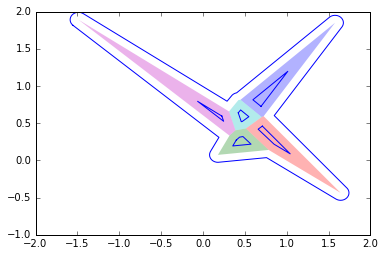

In [184]:
dialatedbound3 = bound.buffer(0.1)

pts = shapely.geometry.base.dump_coords(dialatedbound3)

x,y = zip(*pts[0:130])
plt.plot(x,y)

#Plots the buffer 0.1 units away from any boundary
innerspace=[]
innerarea=[]
for shape in np.arange(130,135):
    x1,y1 = zip(*pts[shape])
    innerspace.append(shapely.geometry.Polygon(zip(x1,y1)))
    plt.plot(x1,y1,'b')

#Plots the Voronoi regions
for i,indices in enumerate(vor.regions):
    if not indices: continue     # check for empty regions
    if -1 in indices: continue   # region includes a vertex out of the diagram (the region goes to infinity)
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)

#Calculates the area of the regions in the center and subtracts 
#them from the total area of the shape to get the area contained
#in the buffer

for shape in innerspace:
    innerarea.append(shape.area)
    
print('The fraction of total area 0.1 units away from any boundary is:\n',(totalarea-sum(innerarea))/totalarea)

### 3. 2D interpolation

Data (found in `python4geosciences/data/MS03_L15.txt`) gathered from a field cruise out of the TAMU Oceanography department is randomly located in space (that is, unstructured) because of the nature of the measurement: the instrument is lowered into the water from a ship, and is brought up and down through the water column as the ship moves to get a sampling of the fields.

Read in the data file and plot the temperature in a `scatter` plot as a function of depth and latitude. Next, interpolate the temperature data to be on a uniform grid (to make it structured). Now, plot it using `contourf`, which requires structured data. Experiment with different spacing in your uniform grid, and with different numbers of contours to see how the results change, and choose values that provide a nice-looking image which closely resembles the original data.

In [102]:
df = pd.read_table('../data/MS03_L15.txt', skiprows=114,
                   delim_whitespace=True,usecols=[0,2,3],
                   names=['latitude','depth','temp'])#,index_col=0) 

x = df['latitude']
y = df['depth']
z = df['temp']

data = np.genfromtxt('../data/MS03_L15.txt',comments='*')
lat = data[:,0]
depth = data[:,2]
temp = data[:,3]


In [103]:
ld=[]
for i,l in enumerate(lat):
    ld.append([lat[i],depth[i]])

tri = spatial.Delaunay(ld)

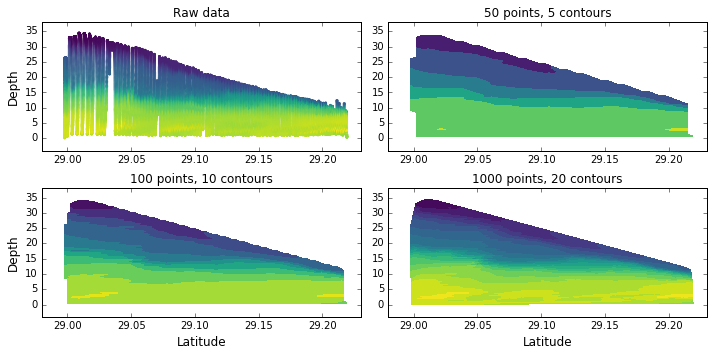

In [101]:
interp = interpolate.LinearNDInterpolator(tri, temp)
ygrid, xgrid = np.mgrid[min(depth):max(depth):500j, min(lat):max(lat):500j]
zgrid = interp(xgrid, ygrid)

fig = plt.figure(figsize=(10, 5))  
ax1 = fig.add_subplot(221) 
ax1.scatter(lat,depth,c=temp,s=8,edgecolor='None',alpha=0.5,cmap='viridis')
ax1.set_ylim(-4,38)
ax1.set_xlim(28.98,29.23)
ax1.set_title('Raw data')
ax1.set_ylabel('Depth',fontsize=12)

ygrid, xgrid = np.mgrid[min(depth):max(depth):50j, min(lat):max(lat):50j]
zgrid = interp(xgrid, ygrid)
ax2 = fig.add_subplot(222)
ax2.contourf(xgrid,ygrid,zgrid,5,cmap = 'viridis') 
ax2.set_ylim(-4,38)
ax2.set_xlim(28.98,29.23)
ax2.set_title('50 points, 5 contours')

ygrid, xgrid = np.mgrid[min(depth):max(depth):100j, min(lat):max(lat):100j]
zgrid = interp(xgrid, ygrid)
ax3 = fig.add_subplot(223)
ax3.contourf(xgrid,ygrid,zgrid,10,cmap = 'viridis') 
ax3.set_ylim(-4,38)
ax3.set_xlim(28.98,29.23)
ax3.set_title('100 points, 10 contours')
ax3.set_xlabel('Latitude',fontsize=12)
ax3.set_ylabel('Depth',fontsize=12)

ygrid, xgrid = np.mgrid[min(depth):max(depth):1000j, min(lat):max(lat):1000j]
zgrid = interp(xgrid, ygrid)
ax4 = fig.add_subplot(224)
ax4.contourf(xgrid,ygrid,zgrid,20,cmap = 'viridis') 
ax4.set_ylim(-4,38)
ax4.set_xlim(28.98,29.23)
ax4.set_title('1000 points, 20 contours')
ax4.set_xlabel('Latitude',fontsize=12)

fig.tight_layout()


### 4. (Grad) Area of Greenland and Australia in different projections

Set up Basemap instances of the following projections: Mercator, Robinson, and Mollweide; make sure that all three projections are set up to show both Greenland and Australia at the same time (this is necessary for Mercator in particular). Plot them side-by-side to see how they compare.

Next, read in the shape files for Greenland and Australia, found in the `data` directory; you can do this with something like the following (but you might need to change the directory path):

> m.readshapefile('../python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
> m.readshapefile('../python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

where `m` is a `Basemap` instance. This gives you a series of polygons that make up each country, saved in `m.greenland` and `m.australia`. Find the area of the two countries in each projection and compare them. What is the area of Australia relative to the area of Greenland for each projection, and how does this compare to what it is in reality?

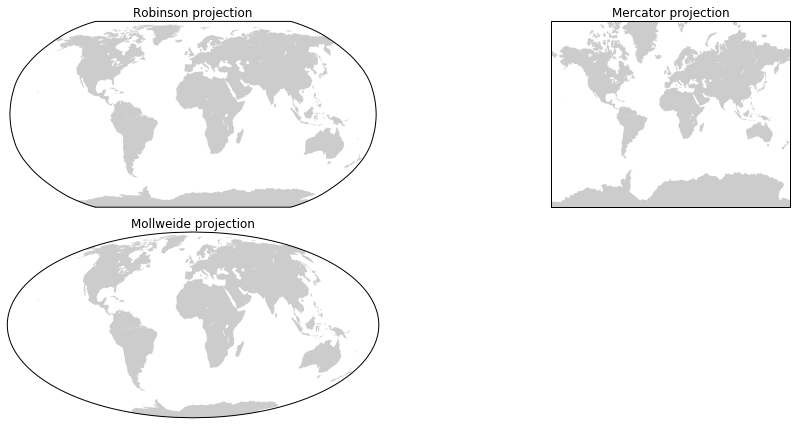

In [188]:
fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(wspace=0.01)
ax1 = fig.add_subplot(221)
m1 = Basemap(projection='robin', lon_0=0)
m1.fillcontinents('0.8')
ax1.set_title('Robinson projection')

ax2 = fig.add_subplot(222)
m2 = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m2.fillcontinents('0.8')
ax2.set_title('Mercator projection')

ax3 = fig.add_subplot(223)
m3 = Basemap(projection='moll',lon_0=0,resolution='c')
m3.fillcontinents('0.8')
ax3.set_title('Mollweide projection')

fig.tight_layout()

In [189]:
fig = plt.figure(figsize=(14,6))

m1 = Basemap(projection='robin', lon_0=0)
#m1.fillcontinents('0.8')

m1.readshapefile('../data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m1.readshapefile('../data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

(1,
 5,
 [112.91972351074276, -55.11694335937477, 0.0, 0.0],
 [159.25608825683616, -9.221098899841202, 0.0, 0.0])

In [190]:
GL=[]
for shape in m1.greenland:
        GL.append(shapely.geometry.Polygon(shape))
gl_area_rob=[]    
for shape in GL:
    gl_area_rob.append(shape.area)

A=[]
for shape in m1.australia:
        A.append(shapely.geometry.Polygon(shape))
a_area_rob=[]    
for shape in A:
    a_area_rob.append(shape.area)  
    
gl_total_rob = sum(gl_area_rob)
a_total_rob = sum(a_area_rob)

print('The area of Greenland in the Robinson projection is:\n',sum(gl_area_rob))
print('The area of Australia in the Robinson projection is :\n',sum(a_area_rob))
print('Australia is', sum(a_area_rob)/sum(gl_area_rob), 'larger than Greenland in the Robinson projection')

The area of Greenland in the Robinson projection is:
 3423077332139.864
The area of Australia in the Robinson projection is :
 6791690518632.53
Australia is 1.98408912789208 larger than Greenland in the Robinson projection


In [191]:
fig = plt.figure(figsize=(14,5))

m2 = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
#m2.fillcontinents('0.8')

m2.readshapefile('../data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m2.readshapefile('../data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

(1,
 5,
 [112.91972351074276, -55.11694335937477, 0.0, 0.0],
 [159.25608825683616, -9.221098899841202, 0.0, 0.0])

In [193]:
GL=[]
for shape in m2.greenland:
        GL.append(shapely.geometry.Polygon(shape))
gl_area_merc=[]    
for shape in GL:
    gl_area_merc.append(shape.area)

A=[]
for shape in m2.australia:
        A.append(shapely.geometry.Polygon(shape))
a_area_merc=[]    
for shape in A:
    a_area_merc.append(shape.area) 
    
gl_total_merc = sum(gl_area_merc)
a_total_merc = sum(a_area_merc)

print('The area of Greenland in the Mercator projection is:\n',sum(gl_area_merc))
print('The area of Australia in the Mercator projection is :\n',sum(a_area_merc))
print('Greenland is', sum(gl_area_merc)/sum(a_area_merc), 'times larger than Australia in the Mercator projection')

The area of Greenland in the Mercator projection is:
 30789355371843.99
The area of Australia in the Mercator projection is :
 8501235310688.83
Greenland is 3.6217507511092784 times larger than Australia in the Mercator projection


In [197]:
fig = plt.figure(figsize=(14,6))

m3 = Basemap(projection='moll',lon_0=0,resolution='c')
#m3.fillcontinents('0.8')

m3.readshapefile('../data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m3.readshapefile('../data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

(1,
 5,
 [112.91972351074276, -55.11694335937477, 0.0, 0.0],
 [159.25608825683616, -9.221098899841202, 0.0, 0.0])

In [195]:
GL=[]
for shape in m3.greenland:
        GL.append(shapely.geometry.Polygon(shape))
gl_area_moll=[]    
for shape in GL:
    gl_area_moll.append(shape.area)

A=[]
for shape in m3.australia:
        A.append(shapely.geometry.Polygon(shape))
a_area_moll=[]    
for shape in A:
    a_area_moll.append(shape.area)
    
gl_total_moll = sum(gl_area_moll)
a_total_moll = sum(a_area_moll)

print('The area of Greenland in the Mollweide projection is:\n',sum(gl_area_moll))
print('The area of Australia in the Mollweide projection is :\n',sum(a_area_moll))
print('Australia is',sum(a_area_moll)/sum(gl_area_moll), 'larger than Greenland in Mollweide projection')

The area of Greenland in the Mollweide projection is:
 2134440862630.9314
The area of Australia in the Mollweide projection is :
 7699609269277.655
Australia is 3.6073190895469676 larger than Greenland in Mollweide projection


Explaination of different projections:

In the Mercator projection, Greenland is apprximately 3.6 times larger than Australia because Greenland is located at lower latitudes. This means that in this projection Greenland is stretched out while Australia remains realtively the same size since it is closer to the equator. The other two projections show the area of Australia to be greater than the area of Greenland. In the Robinson projection, the area of Australia is approximately 2 times the area of Greenland where in the Mollweide projection there is a slightly greater difference. Australia is aproximately 3.5 times the size of Greenland in the Mollweide projection. The Mollweide projection represents a larger difference in the areas because the projection is ellipsoidal which minimizes the distortion at the poles. The Robinson projection stretches the poles into longer lines so there is more distortion at the poles. 

In reality, Australia is approximately 7.75 million square kilometres and Greenland is 2.16 million square kilometres. This means that Australia is about 3.6 times larger than Greenland. This shows that the Mollweide projection most accurately represents the differences in area of Greenland and Australia.